In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

In [2]:
ins = pd.read_csv('/bigdata/data/insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.shape

(1338, 7)

In [5]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age', ylabel='Count'>

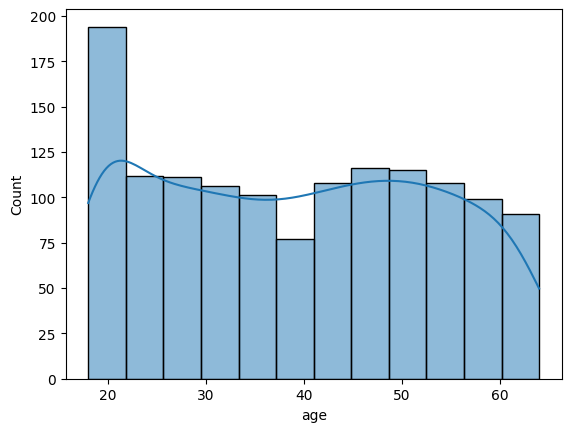

In [3]:
sns.histplot(data=ins, x='age', kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

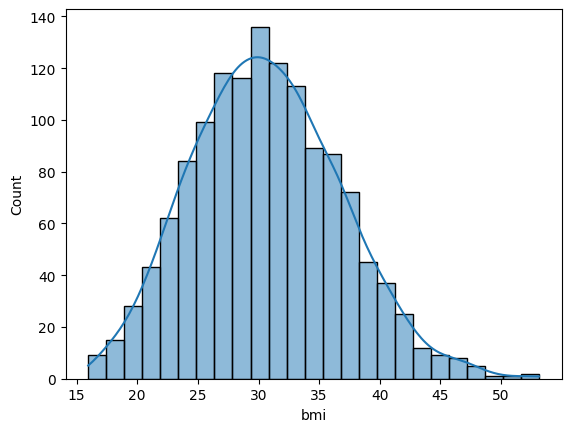

In [6]:
sns.histplot(data=ins, x='bmi', kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

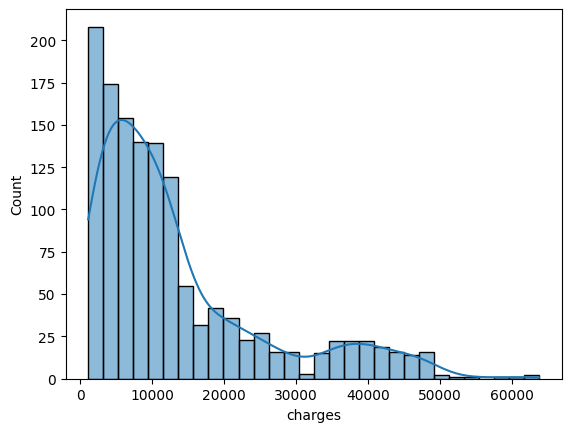

In [7]:
sns.histplot(data=ins, x='charges', kde=True)

In [8]:
res = {}
res['bmi'] = {}
res['charges'] = {}
res['bmi']['mode'] = sts.mode(ins.bmi).mode[0]
res['bmi']['median'] = np.median(ins.bmi)
res['bmi']['mean'] = np.mean(ins.bmi)
res['charges']['mode'] = sts.mode(ins.charges).mode[0]
res['charges']['median'] = np.median(ins.charges)
res['charges']['mean'] = np.mean(ins.charges)
tr = {'mode': 'Мода', 'median': 'Медиана', 'mean': 'Среднее'}
print('Меры центральной тенденции:')
for (feature_name, d) in res.items():
    for (measure_name, value) in d.items():
        print(f'{tr[measure_name]} для {feature_name}: {np.round(value, 2)}')
print()
print('Меры изменчивости:')
print(f'Размах для BMI: {np.round(ins.bmi.max() - ins.bmi.min(), 2)}')
print(f'Стандартное отклонение для BMI: {np.round(ins.bmi.std(), 2)}')
print(f'Межквартильный размах для BMI: {np.round(sts.iqr(ins.bmi, interpolation="midpoint"), 2)}')
print(f'Размах для charges: {np.round(ins.charges.max() - ins.charges.min(), 2)}')
print(f'Стандартное отклонение для charges: {np.round(ins.charges.std(), 2)}')
print(f'Межквартильный размах для charges: {np.round(sts.iqr(ins.charges, interpolation="midpoint"), 2)}')

Меры центральной тенденции:
Мода для bmi: 32.3
Медиана для bmi: 30.4
Среднее для bmi: 30.66
Мода для charges: 1639.56
Медиана для charges: 9382.03
Среднее для charges: 13270.42

Меры изменчивости:
Размах для BMI: 37.17
Стандартное отклонение для BMI: 6.1
Межквартильный размах для BMI: 8.38
Размах для charges: 62648.55
Стандартное отклонение для charges: 12110.01
Межквартильный размах для charges: 11879.8


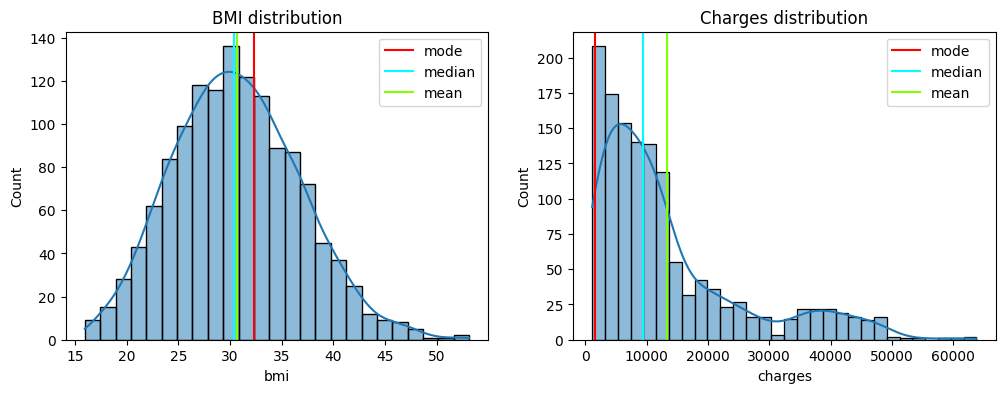

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=ins, x='bmi', kde=True, ax=axes[0])
axes[0].set_title('BMI distribution')
for (name, value), color in zip(res['bmi'].items(), ['red', 'aqua', 'chartreuse']):
    axes[0].axvline(value, linestyle='-', label=name, color=color)
axes[0].legend()
sns.histplot(data=ins, x='charges', kde=True, ax=axes[1])
axes[1].set_title('Charges distribution')
for (name, value), color in zip(res['charges'].items(), ['red', 'aqua', 'chartreuse']):
    axes[1].axvline(value, linestyle='-', label=name, color=color)
axes[1].legend()

Text(0.5, 1.0, 'Age box plot')

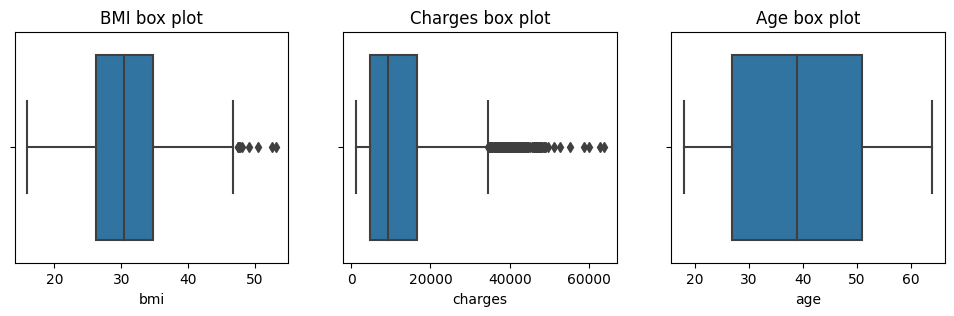

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
sns.boxplot(data=ins, x='bmi', ax=axes[0])
axes[0].set_title('BMI box plot')
sns.boxplot(data=ins, x='charges', ax=axes[1])
axes[1].set_title('Charges box plot')
sns.boxplot(data=ins, x='age', ax=axes[2])
axes[2].set_title('Age box plot')

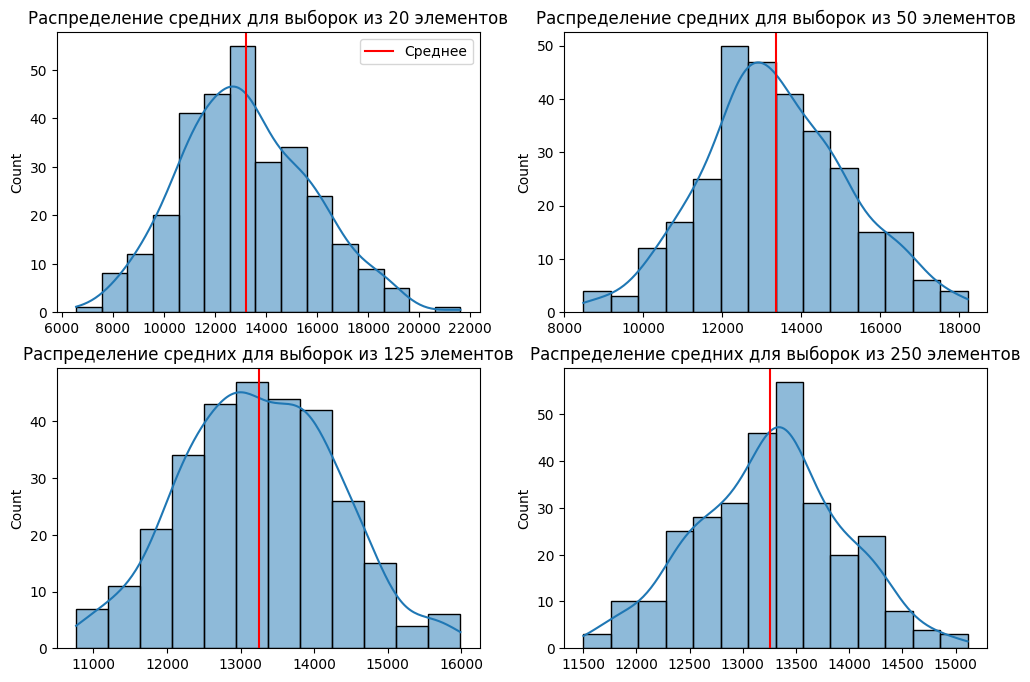

In [11]:
n_items_list = [20, 50, 125, 250]
n_samples = 300
mean_list = []
res_df = pd.DataFrame()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for n_items, i in zip(n_items_list, range(len(n_items_list))):
    for _ in range(n_samples):
        sample = ins.charges.sample(n=n_items)
        mean_list.append(sample.mean())
    res_df[n_items] = pd.Series(mean_list)
    mean_list.clear()
    sns.histplot(data=res_df, x=n_items, kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение средних для выборок из {n_items} элементов')
    label = 'Среднее' if i == 0 else None
    axes[i].axvline(res_df[n_items].mean(), label=label, color='red')
    axes[i].set_xlabel(None)
    if label:
        axes[i].legend()

In [12]:
print(f'Изначальное среднее: {np.round(res["charges"]["mean"], 2)}')
print()
for n_items in n_items_list:
    print(f'Среднее для {n_samples} выборок по {n_items} элементов: {np.round(res_df[n_items].mean(), 2)}')
    print(f'Стандартное отклонение для {n_samples} выборок по {n_items} элементов: {np.round(res_df[n_items].std(), 2)}')
    print()

Изначальное среднее: 13270.42

Среднее для 300 выборок по 20 элементов: 13202.17
Стандартное отклонение для 300 выборок по 20 элементов: 2537.06

Среднее для 300 выборок по 50 элементов: 13362.09
Стандартное отклонение для 300 выборок по 50 элементов: 1827.98

Среднее для 300 выборок по 125 элементов: 13256.95
Стандартное отклонение для 300 выборок по 125 элементов: 1030.96

Среднее для 300 выборок по 250 элементов: 13255.07
Стандартное отклонение для 300 выборок по 250 элементов: 683.79



In [13]:
print(f'Среднее BMI: {np.round(res["bmi"]["mean"], 2)}')
print(f'Среднее charges: {np.round(res["charges"]["mean"], 2)}')

se_bmi = ins.bmi.std() / np.sqrt(ins.bmi.shape[0])
se_charges = ins.charges.std() / np.sqrt(ins.charges.shape[0])

print(f'Стандартная ошибка среднего для  BMI: {np.round(se_bmi, 2)}')
print(f'Стандартная ошибка среднего для  charges: {np.round(se_charges, 2)}')

bmi_bot_95, bmi_top_95 = res["bmi"]["mean"] - 1.96 * se_bmi, res["bmi"]["mean"] + 1.96 * se_bmi
charges_bot_95, charges_top_95 = res["charges"]["mean"] - 1.96 * se_charges, res["charges"]["mean"] + 1.96 * se_charges

print(f'95% доверительный интервал для индекса массы тела: [{np.round(bmi_bot_95, 2)}, {np.round(bmi_top_95, 2)}]')
print(f'95% доверительный интервал для расходов: [{np.round(charges_bot_95, 2)}, {np.round(charges_top_95, 2)}]')

bmi_bot_99, bmi_top_99 = res["bmi"]["mean"] - 2.58 * se_bmi, res["bmi"]["mean"] + 2.58 * se_bmi
charges_bot_99, charges_top_99 = res["charges"]["mean"] - 2.58 * se_charges, res["charges"]["mean"] + 2.58 * se_charges

print(f'99% доверительный интервал для индекса массы тела: [{np.round(bmi_bot_99, 2)}, {np.round(bmi_top_99, 2)}]')
print(f'99% доверительный интервал для расходов: [{np.round(charges_bot_99, 2)}, {np.round(charges_top_99, 2)}]')

Среднее BMI: 30.66
Среднее charges: 13270.42
Стандартная ошибка среднего для  BMI: 0.17
Стандартная ошибка среднего для  charges: 331.07
95% доверительный интервал для индекса массы тела: [30.34, 30.99]
95% доверительный интервал для расходов: [12621.53, 13919.31]
99% доверительный интервал для индекса массы тела: [30.23, 31.09]
99% доверительный интервал для расходов: [12416.27, 14124.58]


In [14]:
sample_size = ins.shape[0]
norm_dist_sample = sts.norm.rvs(size=sample_size, random_state=42)
norm_dist_sample.sort()

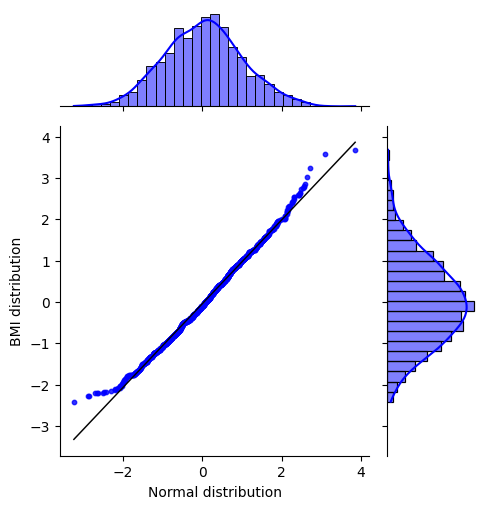

In [15]:
sns.jointplot(x=norm_dist_sample, y=sts.zscore(ins.bmi).sort_values(), kind='reg', height=5,
             ratio=3, color="b", line_kws={'lw': 1, 'color': 'black'},
             truncate=True, scatter_kws={"s": 10,}) \
                 .set_axis_labels('Normal distribution', 'BMI distribution')

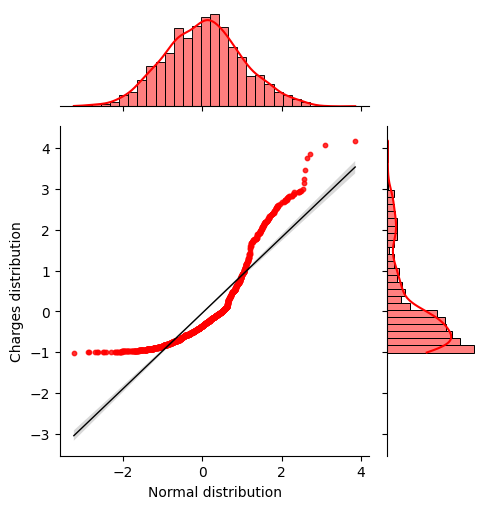

In [16]:
sns.jointplot(x=norm_dist_sample, y=sts.zscore(ins.charges).sort_values(), kind='reg', height=5,
             ratio=3, color="r", line_kws={'lw': 1, 'color': 'black'},
             truncate=True, scatter_kws={"s": 10,}) \
                .set_axis_labels('Normal distribution', 'Charges distribution')

In [17]:
print('Нулевая гипотеза: выборка имеет нормальное распределение.\n'
      'Альтернативная гипотеза: выборка не имеет нормального распределения.\n')

def check_norm_ks(data):
    stat, pvalue = sts.kstest(sts.zscore(data), 'norm')
    accept = False if pvalue <= 0.05 else True
    return (f'P-уровень значимости {"больше" if accept else "меньше"} 0.05 ({pvalue}), '
          f'нулевая гипотеза {"принимается" if accept else "отвергается"} '
          f'(распределение выборки{" примерно" if accept else " не"} соответствует нормальному).')
    
print('BMI: ', check_norm_ks(ins.bmi))
print('Charges: ', check_norm_ks(ins.charges))

Нулевая гипотеза: выборка имеет нормальное распределение.
Альтернативная гипотеза: выборка не имеет нормального распределения.

BMI:  P-уровень значимости больше 0.05 (0.31453976932347394), нулевая гипотеза принимается (распределение выборки примерно соответствует нормальному).
Charges:  P-уровень значимости меньше 0.05 (4.39305730768502e-42), нулевая гипотеза отвергается (распределение выборки не соответствует нормальному).


In [18]:
ecdc = pd.read_csv('/bigdata/data/ECDCCases.csv')

In [19]:
ecdc.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


In [20]:
ecdc.shape

(61904, 12)

In [21]:
ecdc.isna().sum().sort_values(ascending=False) / ecdc.shape[0] * 100

Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
continentExp                                                  0.000000
dtype: float64

Два столбца, в которых больше всего пропущенных значений: Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, geoId.

In [22]:
ecdc = ecdc.drop(columns=['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'])

In [23]:
ecdc[ecdc.countryterritoryCode.isna()].groupby('countriesAndTerritories').agg({'year': 'count'})

,year
countriesAndTerritories,
Cases_on_an_international_conveyance_Japan,64
Wallis_and_Futuna,59


Код страны для "Wallis_and_Futuna" можно поставить как WF. Для первого случая - Other.

In [24]:
ecdc[ecdc.countriesAndTerritories == 'Wallis_and_Futuna'].shape

(59, 10)

Все значения столбцов countryterritoryCode и popData2019 не заполнены для Wallis_and_Futuna.

In [25]:
ecdc[ecdc.countriesAndTerritories == 'Wallis_and_Futuna'].isna().sum()

dateRep                     0
day                         0
month                       0
year                        0
cases                       0
deaths                      0
countriesAndTerritories     0
countryterritoryCode       59
popData2019                59
continentExp                0
dtype: int64

Т. к. собираемся использовать WF вместо пропущенных значений, надо бы проверить не используется ли такое обозначение где-то ещё.

In [26]:
ecdc[ecdc.countryterritoryCode == 'WF'].shape

(0, 10)

Значение не используется, так что можно заменить пустые значения на него.

In [27]:
ecdc.loc[ecdc['countriesAndTerritories'] == 'Wallis_and_Futuna', 'countryterritoryCode'] = 'WF'

In [28]:
ecdc[ecdc.countriesAndTerritories == 'Wallis_and_Futuna'].isna().sum()

dateRep                     0
day                         0
month                       0
year                        0
cases                       0
deaths                      0
countriesAndTerritories     0
countryterritoryCode        0
popData2019                59
continentExp                0
dtype: int64

С Cases_on_an_international_conveyance_Japan в разделе страны ситуация такая же, везде не заполнены численность населения и код страны. С кодом страны ситуация менее очевидная, так как не совсем ясно что это за страна, так что заменим на Other.

In [29]:
ecdc.loc[ecdc['countriesAndTerritories'] == 'Cases_on_an_international_conveyance_Japan', 'countryterritoryCode'] = 'Other'

In [30]:
ecdc[ecdc.popData2019.isna()].groupby('countriesAndTerritories').agg({'year': 'count'})

,year
countriesAndTerritories,
Cases_on_an_international_conveyance_Japan,64
Wallis_and_Futuna,59


По заданию поменяем эти пропущенные значения на медиану.

In [31]:
pop_median = ecdc.popData2019.median()
ecdc.popData2019.fillna(pop_median, inplace=True)

In [32]:
ecdc.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

Пропущенных значений больше не осталось.

In [33]:
ecdc.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


Очевидно, что выбросы содержат столбцы cases и deaths. Можно посмотреть подробнее, построив box-графики.

<AxesSubplot:xlabel='cases'>

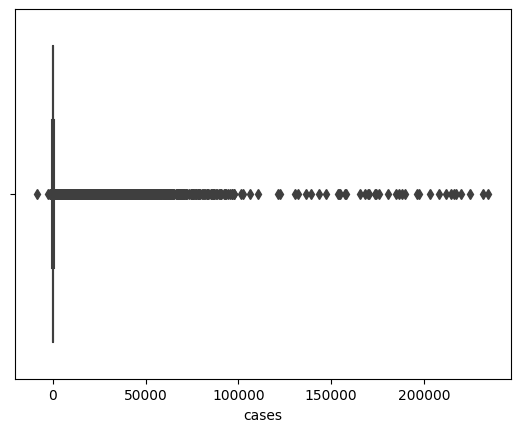

In [34]:
sns.boxplot(data=ecdc, x='cases')

Также тут возникает интересная ситуация, когда количество случаев и смертей меньше нуля. Либо это просто ошибка при заполнении,  либо это тенденция относительно прошлого дня, но таких значений очень мало, не совсем понятно что с этим делать.

In [35]:
ecdc[ecdc.cases < 0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
6313,20/05/2020,20,5,2020,-209,0,Benin,BEN,11801151.0,Africa
10937,10/03/2020,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,Other,7169456.0,Other
16908,07/09/2020,7,9,2020,-8261,3800,Ecuador,ECU,17373657.0,America
17026,12/05/2020,12,5,2020,-50,18,Ecuador,ECU,17373657.0,America
17029,09/05/2020,9,5,2020,-1480,50,Ecuador,ECU,17373657.0,America
17031,07/05/2020,7,5,2020,-2461,49,Ecuador,ECU,17373657.0,America
20560,03/06/2020,3,6,2020,-766,107,France,FRA,67012883.0,Europe
29278,20/06/2020,20,6,2020,-148,47,Italy,ITA,60359546.0,Europe
30172,11/09/2020,11,9,2020,-6,0,Jersey,JEY,107796.0,Europe
30493,22/07/2020,22,7,2020,-110,0,Jordan,JOR,10101697.0,Asia


In [36]:
ecdc[ecdc.deaths < 0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
15115,06/07/2020,6,7,2020,75,-3,Czechia,CZE,10649800.0,Europe
15116,05/07/2020,5,7,2020,121,-1,Czechia,CZE,10649800.0,Europe
28209,03/10/2020,3,10,2020,466,-5,Ireland,IRL,4904240.0,Europe
29273,25/06/2020,25,6,2020,577,-31,Italy,ITA,60359546.0,Europe
31306,06/08/2020,6,8,2020,218,-12,Kosovo,XKX,1798506.0,Europe
31911,24/08/2020,24,8,2020,237,-443,Kyrgyzstan,KGZ,6415851.0,Asia
52850,12/08/2020,12,8,2020,3172,-2,Spain,ESP,46937060.0,Europe
52929,25/05/2020,25,5,2020,-372,-1918,Spain,ESP,46937060.0,Europe


<AxesSubplot:xlabel='deaths'>

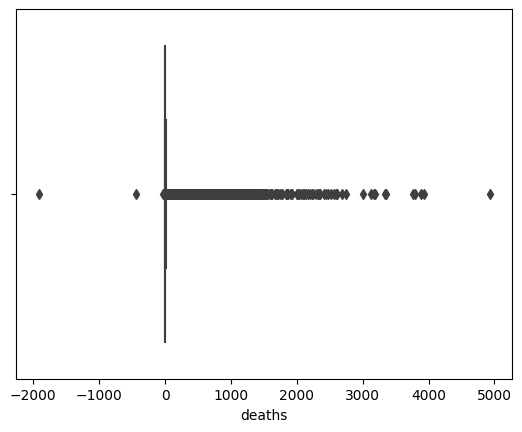

In [37]:
sns.boxplot(data=ecdc, x='deaths')

In [38]:
ecdc[ecdc.deaths > 3000]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2118,02/10/2020,2,10,2020,14001,3351,Argentina,ARG,44780675.0,America
16908,07/09/2020,7,9,2020,-8261,3800,Ecuador,ECU,17373657.0,America
37038,09/10/2020,9,10,2020,4936,3013,Mexico,MEX,127575529.0,America
44888,14/08/2020,14,8,2020,9441,3935,Peru,PER,32510462.0,America
44909,24/07/2020,24,7,2020,4546,3887,Peru,PER,32510462.0,America
59007,12/12/2020,12,12,2020,234633,3343,United_States_of_America,USA,329064917.0,America
59009,10/12/2020,10,12,2020,220025,3124,United_States_of_America,USA,329064917.0,America
59016,03/12/2020,3,12,2020,203311,3190,United_States_of_America,USA,329064917.0,America
59239,24/04/2020,24,4,2020,26543,3179,United_States_of_America,USA,329064917.0,America
59245,18/04/2020,18,4,2020,30833,3770,United_States_of_America,USA,329064917.0,America


In [39]:
ecdc[ecdc.deaths > 3000].groupby('countriesAndTerritories', as_index=False).agg({'day': 'count', 'deaths': 'sum'}) \
    .rename(columns={'day': 'Number of days', 'deaths': 'Overall deaths'})

,countriesAndTerritories,Number of days,Overall deaths
0,Argentina,1,3351
1,Ecuador,1,3800
2,Mexico,1,3013
3,Peru,2,7822
4,United_States_of_America,6,21534


In [40]:
ecdc[ecdc.duplicated(keep=False)]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
217,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48009,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48072,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


In [41]:
ecdc = ecdc.drop_duplicates()

In [42]:
ecdc[ecdc.duplicated(keep=False)].shape

(0, 10)

In [43]:
bmi = pd.read_csv('/bigdata/data/bmi.csv')

In [44]:
bmi.head()

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest


In [45]:
bmi.shape

(650, 2)

In [46]:
bmi.region.value_counts()

northwest    325
southwest    325
Name: region, dtype: int64

In [47]:
bmi_nw = bmi.loc[bmi.region == 'northwest', 'bmi']
bmi_sw = bmi.loc[bmi.region == 'southwest', 'bmi']

In [48]:
print('Нулевая гипотеза: выборка имеет нормальное распределение.\n'
      'Альтернативная гипотеза: выборка не имеет нормального распределения.\n')

def check_norm_shapiro(data):
    stat, pvalue = sts.shapiro(data)
    accept = False if pvalue <= 0.05 else True
    return (f'P-уровень значимости {"больше" if accept else "меньше"} 0.05 ({pvalue}), '
          f'нулевая гипотеза {"принимается" if accept else "отвергается"} '
          f'(распределение выборки {"примерно" if accept else "не"} соответствует нормальному).')
    
print('Northwest: ', check_norm_shapiro(bmi_nw))
print('Southwest: ', check_norm_shapiro(bmi_sw))

Нулевая гипотеза: выборка имеет нормальное распределение.
Альтернативная гипотеза: выборка не имеет нормального распределения.

Northwest:  P-уровень значимости больше 0.05 (0.46545225381851196), нулевая гипотеза принимается (распределение выборки примерно соответствует нормальному).
Southwest:  P-уровень значимости больше 0.05 (0.3630009591579437), нулевая гипотеза принимается (распределение выборки примерно соответствует нормальному).


In [49]:
print('Нулевая гипотеза: рассматриваемые выборки получены из генеральных совокупностей, обладающих одинаковыми дисперсиями.\n'
      'Альтернативная гипотеза: рассматриваемые выборки получены из генеральных совокупностей, обладающих разными дисперсиями..\n')

def check_var_bartlett(sample1, sample2):
    stat, pvalue = sts.bartlett(sample1, sample2)
    accept = False if pvalue <= 0.05 else True
    return (f'P-уровень значимости {"больше" if accept else "меньше"} 0.05 ({pvalue}), '
          f'нулевая гипотеза {"принимается" if accept else "отвергается"} '
          f'(дисперсии выброк{" примерно" if accept else " не"} одинаковые).')
    
print(check_var_bartlett(bmi_nw, bmi_sw))

Нулевая гипотеза: рассматриваемые выборки получены из генеральных совокупностей, обладающих одинаковыми дисперсиями.
Альтернативная гипотеза: рассматриваемые выборки получены из генеральных совокупностей, обладающих разными дисперсиями..

P-уровень значимости больше 0.05 (0.06519347353581818), нулевая гипотеза принимается (дисперсии выброк примерно одинаковые).


In [50]:
stat_ttest, pvalue_ttest = sts.ttest_ind(bmi_nw, bmi_sw)
print(pvalue_ttest)
print('P-значение намного ниже 0.05, следовательно нулевая гипотеза отвергается, выборки принадлежат к разным '
      'генеральным совокупностям и их средние значения различны.')

0.001076958496307695
P-значение намного ниже 0.05, следовательно нулевая гипотеза отвергается, выборки принадлежат к разным генеральным совокупностям и их средние значения различны.


In [51]:
dice = pd.DataFrame({'N': [1, 2, 3, 4, 5, 6], 'Number of drops': [97, 98, 109, 95, 97, 104]})
dice

,N,Number of drops
0,1,97
1,2,98
2,3,109
3,4,95
4,5,97
5,6,104


In [52]:
dice['Expected drops'] = 100
dice

,N,Number of drops,Expected drops
0,1,97,100
1,2,98,100
2,3,109,100
3,4,95,100
4,5,97,100
5,6,104,100


In [53]:
stat_chisquare, pvalue_chisquare = sts.chisquare(dice['Number of drops'], dice['Expected drops'])
print(pvalue_chisquare)
print('Основываясь на p-value (> 0.05) делаем вывод, что распределение равномерное.')

0.9198882077437889
Основываясь на p-value (> 0.05) делаем вывод, что распределение равномерное.


In [54]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

In [55]:
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [56]:
print('H0: категориальные переменные семейное положение и занятость независимы\n'
      'H1: категориальные переменные семейное положение и занятость связаны между собой.')

def check_depend_chisquared(data):
    pvalue = sts.chi2_contingency(data)[1]
    accept = False if pvalue <= 0.05 else True
    return (f'P-уровень значимости {"больше" if accept else "меньше"} 0.05 ({pvalue}), '
          f'нулевая гипотеза {"принимается" if accept else "отвергается"} '
          f'(семейное положение и занятость {"независимы" if accept else "связаны между собой"}).')

print(check_depend_chisquared(data))

H0: категориальные переменные семейное положение и занятость независимы
H1: категориальные переменные семейное положение и занятость связаны между собой.
P-уровень значимости меньше 0.05 (1.7291616900960234e-21), нулевая гипотеза отвергается (семейное положение и занятость связаны между собой).
